# EP1 - MAC0209

* Bruna Thalenberg - 8569211
* Eduardo Freire - 10262627
* Erica Cope - 9299091
* Guilherme Yambanis - 8041265
* Leonardo Rezende - 10297838
* Nathan Benedetto Proença - 8941276

(Grupo Modeletes)

## Introdução

O presente estudo tem o objetivo de estudar o comportamento dos movimentos uniforme e uniformemente variado por meio de experimentos e simulações algorítmicas e da comparação de dados experimentais e simulados. Foram utilizados os modelos clássicos que descrevem tais movimentos para as simulações, por meio de resolução analítica das equações.

In [1]:
import csv
import pandas
import math
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Métodos

### Experimentos
Para o experimento de Movimento Uniforme, o grupo aproveitou-se de uma calçada com lajotas uniformes, de 30 cm e rejunte de 4 cm. Essas marcações foram utilizadas para dimensionar os passos da pessoa realizando a travessia, que fez uso de um metrônomo a 80 bpm para realizar as passadas.

Para o experimento de Movimento Uniformemente Variado, utilizou-se de uma rua inclinada, com inclinação aproximada de $5^o$ e um skate, garantindo a aceleração constante da gravidade. Travessias foram realizadas nas posições em pé e sentada.

Com o auxílio de fita métrica, foram realizadas marcações a cada 5 metros. Cada travessia foi realizada três vezes, duas vezes com cronômetros pareados nas posições 10, 20 e 30 metros, e uma vez nas posições 5, 10, 15, 20, 25 e 30 metros. 

O tempo de travessia foi medido com o uso de cronômetros de aparelhos celulares e anotado manualmente em uma prancheta, para a posterior transposição para arquivos _csv_. Foi utilizado o acelerômetro de um celular Android, por meio do aplicativo _Physics Toolbox_, para obter dados adicionais a respeito da travessia. Esse celular foi operado pela pessoa que atravessava, com cinco segundos de período de estabilização inicial e final. 

### Simulações

A partir dos dados obtidos, foi calculada a velocidade média de cada travessia, a partir da soma do tempo total de cada iteração, dividida pela metragem total. Quando havia dois cronômetros pareados na posição $ d = 30 m$, foi utilizada a média entre ambos. A partir da velocidade média, foi calculado analiticamente o tempo decorrido do início até cada posição utilizando-se as equações da física newtoniana de cada movimento, respectivamente $ S = S_0 + vt$ e $ S = S_0 + v_0t + \alpha \frac{t^2}{2} $. Note que a velocidade inicial do MUV será sempre 0, uma vez que o movimento inicia-se do repouso. A posição inicial será também sempre 0, por convenção.


In [2]:
def prepara_figura(titulo, eixo_x, eixo_y):
    plt.figure(figsize=(10,10))
    plt.title(titulo)
    plt.xlabel(eixo_x)
    plt.ylabel(eixo_y)

def ler_cron(arquivo_cron):
    t = []
    with open (arquivo_cron, "r") as mu1:
        rd = csv.reader(mu1, quoting=csv.QUOTE_NONNUMERIC)
        for line in rd:
            t.append([0] + line)
             
    t_seq = (t[6][1:] + t[7])
    t_seq.sort()
    return t, t_seq
    
def estima_ac(df):
    focus = (10 <= df.time) & (df.time <= 12)
    return np.mean(df[focus].TgF)

def mostra_ac(df, nome, a_ana = None):
    focus = (0 <= df.time)
    prepara_figura(nome, 'tempo (s)', 'aceleração (m/s^2)')
    times = df[focus].time
    plt.plot(times, df[focus].gFx)
    plt.plot(times, df[focus].gFy)
    plt.plot(times, df[focus].gFz)
    
    if(a_ana != None):
        plt.plot(times, times*0 + a_ana)
    else:
        plt.plot(times, estima_ac(df) * np.ones(times.shape))
    
    plt.legend(loc = 0)

In [3]:
p1 = [0, 10, 20, 30]
p2 = [0, 5, 10, 15, 20, 25, 30]

def plota_mu(arquivo_cron, n, df_acel):
    t, t_seq = ler_cron(arquivo_cron)

    for i in range(2):
        j = 3*i
        mostra_ac(df_acel[i], "Travessia {}.{} - MU: Acelerômetro".format(n,1 + i))
        
        # Calculando velocidade média
        v = 30 / ((t[j][3] + t[j + 1][3]) / 2)
        tAna = []
        for x in p1:
            tAna.append(nextTmu(x, v))
        
        prepara_figura("Travessia {}.{} - MU: Cronômetros Pareados".format(n, 1 + i),
                       'distância (m)', 'tempo (s)')
        plt.plot(p1, t[j + 0], 'co', linestyle = "", label = "Experimental: c. esquerdo")
        plt.plot(p1, t[j + 1],'bo', linestyle = "", label = "Experimental: c. direito")
        plt.plot(p1, tAna, 'k--', label = "Analítico")
        plt.legend(loc = 0)

        erro1 = [abs(x - y) for x, y in zip(t[j + 0], tAna)]
        erro2 = [abs(x - y) for x, y in zip(t[j + 1], tAna)]
        print("({}.{}) Módulo do erro para cronômetro esquerdo:".format(n, 1 + i), erro1)
        print("({}.{}) Módulo do erro para cronômetor direito:".format(n, 1 + i), erro2)
        
    # Calculando analiticamente para a travessia 1.3
    # Obtendo velocidade média a partir do tempo total (média dos 2 cronômetros) / espaço
    v = 30 / t_seq[6]
    tAna = []
    for x in p2:
        tAna.append(nextTmu(x, v))
    
    mostra_ac(df_acel[2], "Travessia {}.3 - MU: Acelerômetro".format(n))
    
    prepara_figura("Travessia {}.3 - MU: cronômetros invertidos".format(n), 'distância (m)', 'tempo (s)')
    plt.plot(p2, t_seq, 'bo', linestyle = "", label = "Experimental")
    plt.plot(p2, tAna, 'k--', label = "Analítico")
    plt.legend(loc = 0)

    erro1 = [abs(x - y) for x, y in zip(t_seq, tAna)]
    print("({}.{}) Módulo do erro:".format(n, 3), erro1)

In [4]:
p1 = [0, 10, 20, 30]
p2 = [0, 5, 10, 15, 20, 25, 30]

def plota_muv(arquivo_cron, n, df_acel):
    t, t_seq = ler_cron(arquivo_cron)

    for i in range(2):
        j = 3*i
        
        # Calculando analiticamente para a travessia 1.1
        # Obtendo velocidade média a partir do tempo total (média dos 2 cronômetros) / espaço
        a = 60 / (((t[0][3] + t[1][3]) / 2) * ((t[0][3] + t[1][3]) / 2) )
        tAna = []
        poriginal= []
        toriginal= []
        for x in range (0, 30):
            poriginal.append(x);
            tAna.append(nextTmuv(x, a))
        
        mostra_ac(df_acel[i], "Travessia {}.{} - MUV: Acelerômetro".format(n, 1 + i), a)

        prepara_figura("Travessia {}.{} - MUV: Cronômetros Pareados".format(n, 1 + i),
                       "distância (m)", "tempo (s)")
        plt.plot(p1, t[j + 0], 'co', linestyle = "", label = "Experimental: c. esquerdo")
        plt.plot(p1, t[j + 1],'bo', linestyle = "", label = "Experimental: c. direito")
        plt.plot(poriginal, tAna, 'k--', label = "Analítico")
        plt.legend(loc = 0)

        erro1 = [abs(x - y) for x, y in zip(t[j], tAna)]
        erro2 = [abs(x - y) for x, y in zip(t[j + 1], tAna)]
        print("({}.{}) Módulo do erro para cronômetro esquerdo:".format(n, 1 + i), erro1)
        print("({}.{}) Módulo do erro para cronômetor direito:".format(n, 1 + i), erro2)
    # Calcula aceleração
    a = 60 / (((t[0][3] + t[1][3]) / 2) * ((t[0][3] + t[1][3]) / 2) )
    tAna = []
    poriginal= []
    for x in range (0, 30):
        poriginal.append(x)
        tAna.append(nextTmuv(x, a))
    
    mostra_ac(df_acel[2], "Travessia {}.3 - MUV: Acelerômetro".format(n))
    
    prepara_figura("Travessia {}.3 - MUV: Cronômetros invertidos".format(n),
                   "distância (m)", "tempo (s)")
    plt.plot(p2, t_seq, 'co', linestyle = "", label = "Experimental: c. esquerdo")
    plt.plot(poriginal, tAna, 'k--', label = "Analítico")
    plt.legend(loc = 0)

    erro1 = [abs(x - y) for x, y in zip(t_seq, tAna)]
    print("Módulo do erro:", erro1)

In [5]:
def nextTmu(x, v):
    """ calcula quanto tempo foi necessário para atingir a posição x, dada a velocidade v
        
    Parâmetros:
    -----------
    x: float - Posição atual
    v: float - Velocidade do movimento
    
    Returns:
    --------
    t: float : tempo decorrido
    
    """
    if v == 0:
        return x
    return x/v

def nextTmuv(x, a):
    """ nextTmu implementa o método analítico para calcular o tempo decorrido dado uma aceleração média.
    Assume velocidade inicial 0, uma vez que o fenômeno modelado utiliza-se apenas da aceleração fornecida
    pela gravidade a partir de um corpo parado.
        
    Parâmetros:
    -----------
    x: float - Posição atual
    a: float - Aceleração média do movimento
    
    Returns:
    --------
    t: float : tempo pra realizar o percurso
    
    """
    if a == 0:
        return 0
    return math.sqrt(2*x/a)

## Verificação do programa

In [6]:
# testando a função que calcula o tempo para o MU
v = 2
r = []
s = [0, 1, 2, 3, 4, 5, 6]
r_esperado = [0, 0.5, 1, 1.5, 2, 2.5, 3]

for x in s:
    r.append(nextTmu(x, v))
    
if r == r_esperado:
    print("O programa funciona fornece o resultado esperado.")
    
# teste de corner case
x = nextTmu(0, 0)
if (x == 0):
    print("O programa funciona corretamente para caso extremo.")   

O programa funciona fornece o resultado esperado.
O programa funciona corretamente para caso extremo.


In [7]:
# testando a função que calcula o tempo para o MUV
a = 10
r = []
s = [0, 5, 20, 45]
r_esperado = [0, 1, 2, 3]

for x in s:
    r.append(nextTmuv(x, a))
    
if r == r_esperado:
    print("O programa funciona fornece o resultado esperado.")
    
# teste de corner case
x = nextTmuv(0, 0)
if (x == 0):
    print("O programa funciona corretamente para caso extremo.")   

O programa funciona fornece o resultado esperado.
O programa funciona corretamente para caso extremo.


## Dados

### Movimento Uniforme

Nos conjuntos de gráficos a seguir, exibimos os resultados das três travessias do movimento retilíneo uniforme, em três iterações cada: as duas primeiras, com cronômetros pareados nas posições 10, 20 e 30, e a terceira, com cronômetros nas posições 5, 10, 15, 20, 25, 30. Os dados experimentais são representados por pequenos círculos nas posições correspondentes às de cada cronômetro. No gráfico de cada travessia, apresentamos, também, na linha tracejada, o comportamento esperado do movimento uniforme, obtido de forma analítica.

(1.1) Módulo do erro para cronômetro esquerdo: [0.0, 0.12833333333333385, 0.06666666666666643, 0.06500000000000128]
(1.1) Módulo do erro para cronômetor direito: [0.0, 0.038333333333333997, 0.03333333333333499, 0.06500000000000128]
(1.2) Módulo do erro para cronômetro esquerdo: [0.0, 0.021666666666670054, 0.006666666666660603, 0.035000000000003695]
(1.2) Módulo do erro para cronômetor direito: [0.0, 0.13166666666666949, 0.09333333333333727, 0.03499999999999659]
(1.3) Módulo do erro: [0.0, 0.07833333333333226, 0.44333333333333513, 0.054999999999999716, 0.11333333333332973, 0.018333333333337976, 0.0]


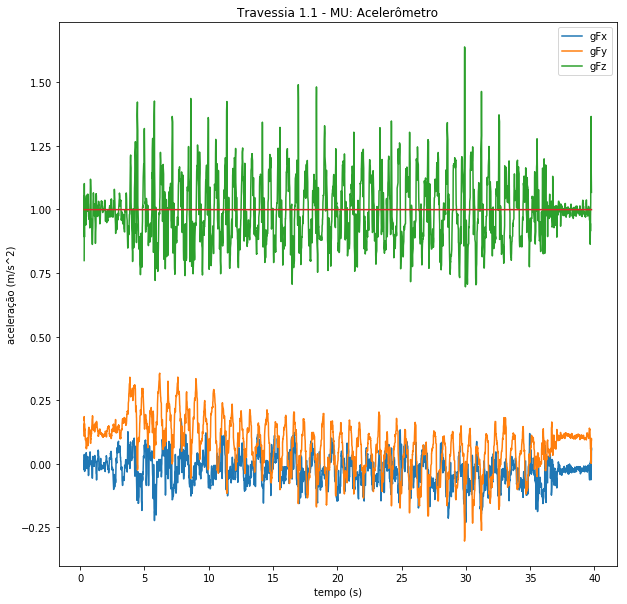

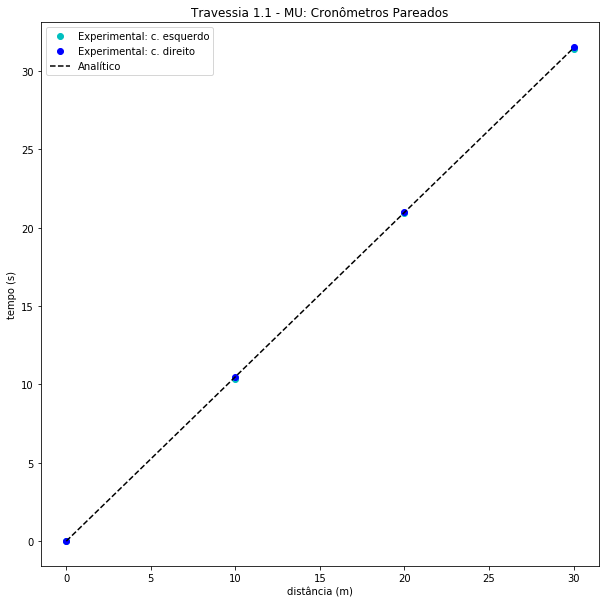

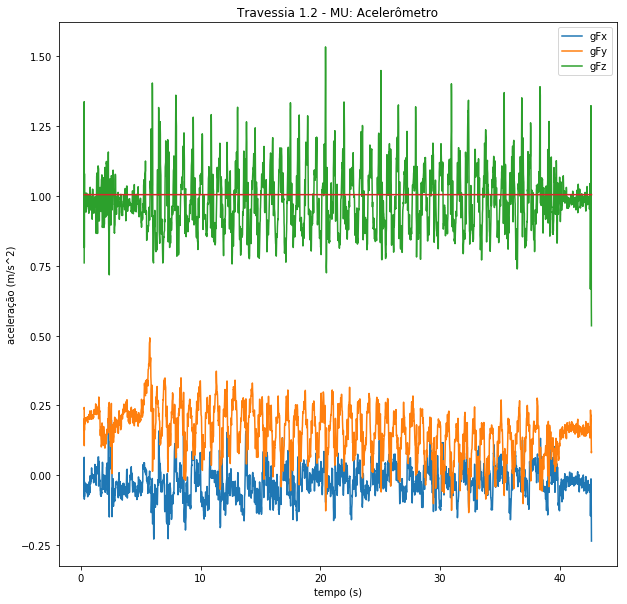

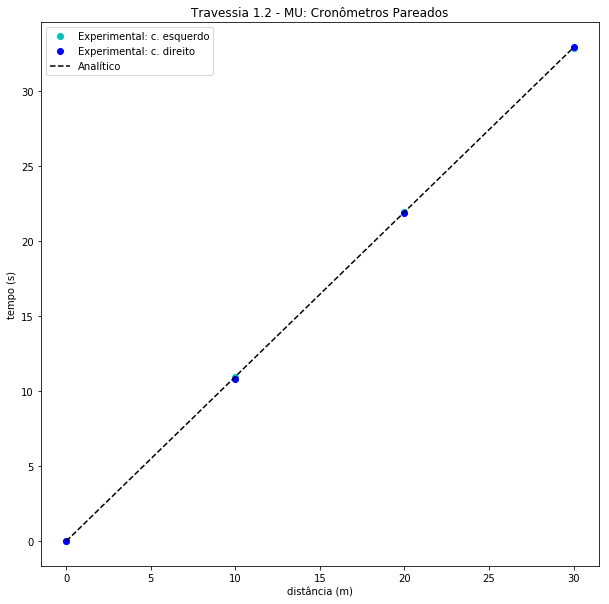

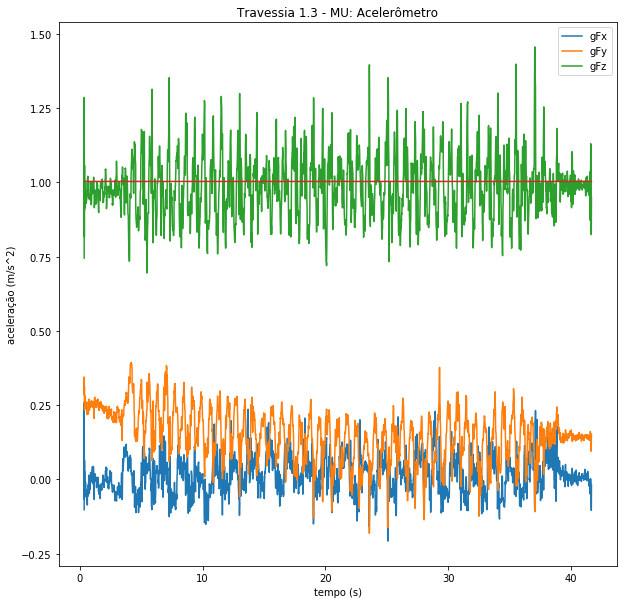

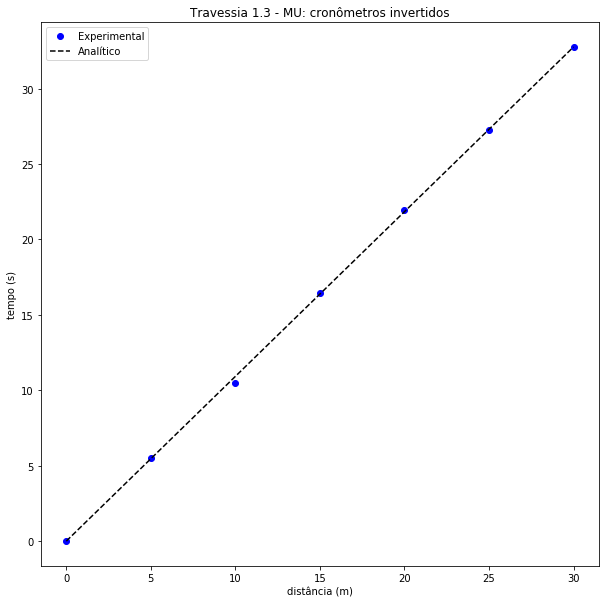

In [8]:
arquivos_acel = ["acelerometro/MU1 - 2018-03-1213.08.14.csv",
                 "acelerometro/MU2 - 2018-03-1213.11.24.csv",
                 "acelerometro/MU3 - 2018-03-1213.14.20.csv"]
plota_mu("tempo/tempo-gui.csv", 1, [pandas.read_csv(arq) for arq in arquivos_acel])

(2.1) Módulo do erro para cronômetro esquerdo: [0.0, 0.09333333333333194, 0.013333333333335418, 0.05000000000000426]
(2.1) Módulo do erro para cronômetor direito: [0.0, 0.1233333333333313, 0.003333333333337407, 0.04999999999999716]
(2.2) Módulo do erro para cronômetro esquerdo: [0.0, 0.23166666666666735, 0.046666666666666856, 0.02499999999999858]
(2.2) Módulo do erro para cronômetor direito: [0.0, 0.16166666666666707, 0.09666666666666401, 0.02499999999999858]
(2.3) Módulo do erro: [0.0, 0.014999999999998792, 0.06999999999999851, 0.3249999999999993, 0.04999999999999716, 0.27500000000000213, 0.0]


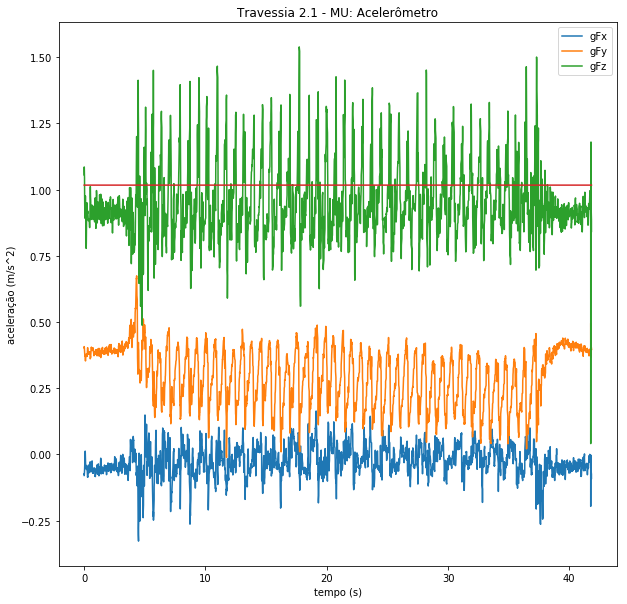

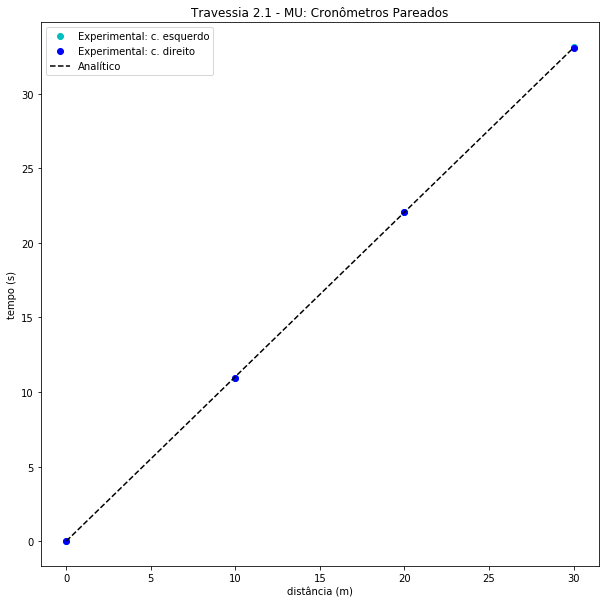

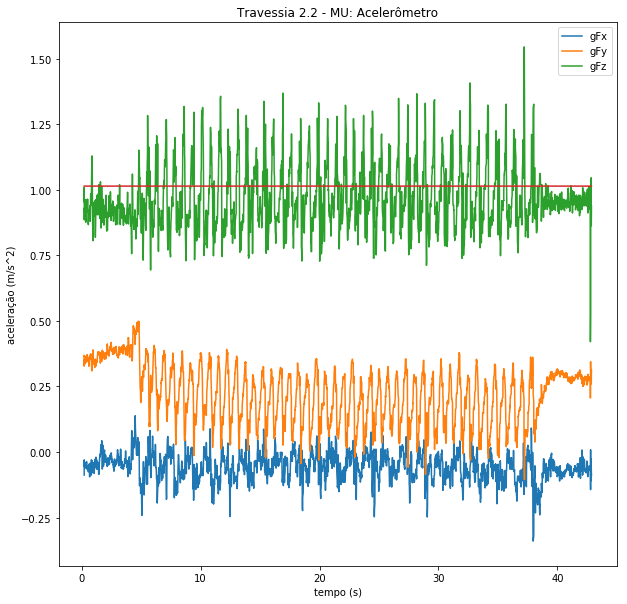

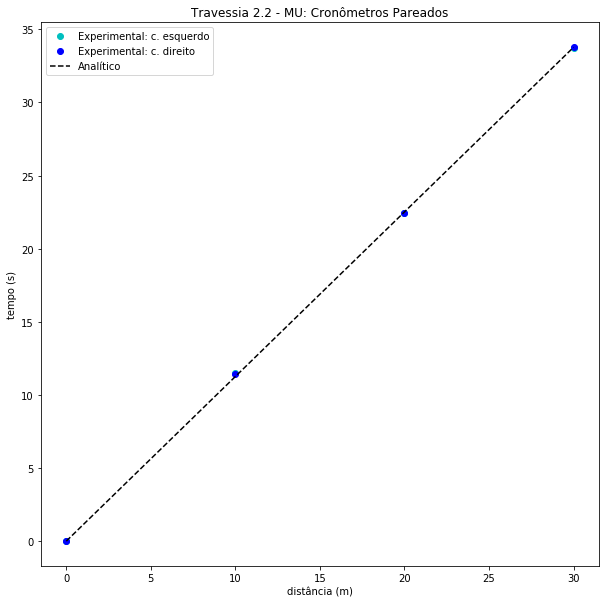

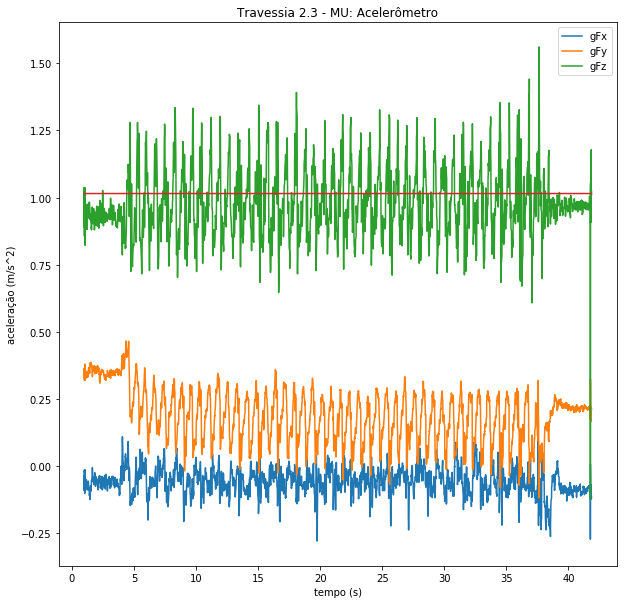

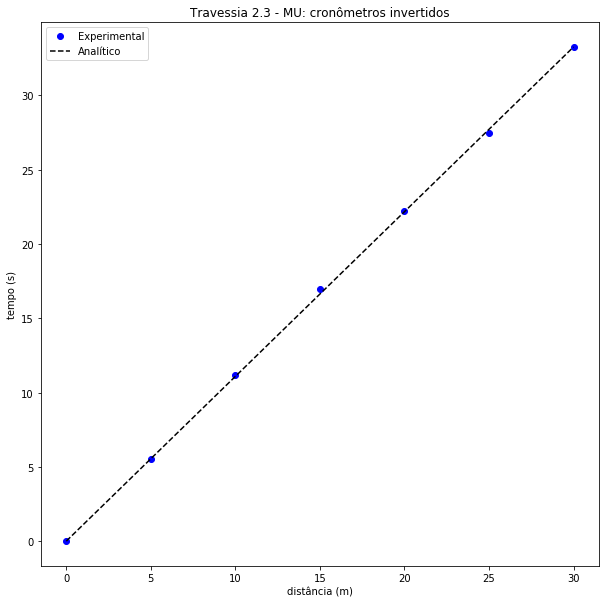

In [9]:
arquivos_acel = ["acelerometro/MU4 - 2018-03-1213.17.38.csv",
                 "acelerometro/MU5 - 2018-03-1213.19.45.csv",
                 "acelerometro/MU6 - 2018-03-1213.21.28.csv"]
plota_mu("tempo/tempo-edu.csv", 2, [pandas.read_csv(arq) for arq in arquivos_acel])

(3.1) Módulo do erro para cronômetro esquerdo: [0.0, 0.2833333333333332, 0.10666666666666558, 0.14000000000000057]
(3.1) Módulo do erro para cronômetor direito: [0.0, 0.27333333333333343, 0.23666666666666814, 0.14000000000000057]
(3.2) Módulo do erro para cronômetro esquerdo: [0.0, 0.25499999999999723, 0.11999999999999389, 0.0449999999999946]
(3.2) Módulo do erro para cronômetor direito: [0.0, 0.24499999999999744, 0.20999999999999375, 0.045000000000001705]
(3.3) Módulo do erro: [0.0, 0.21999999999999975, 0.14000000000000057, 0.3999999999999986, 0.010000000000001563, 0.1999999999999993, 0.0]


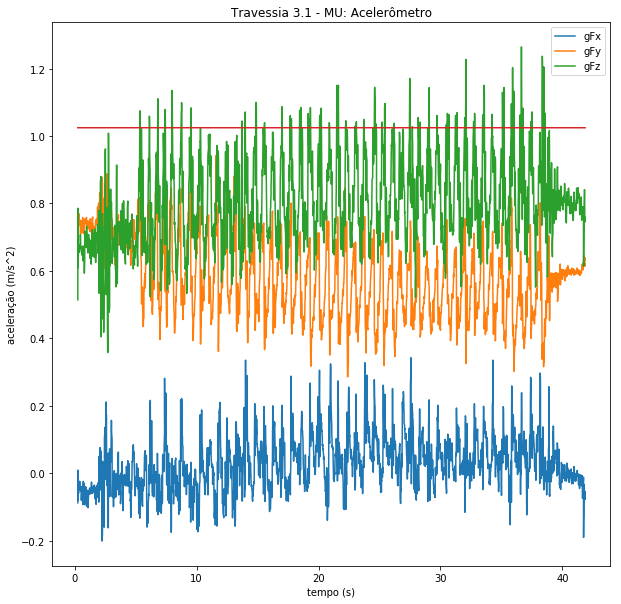

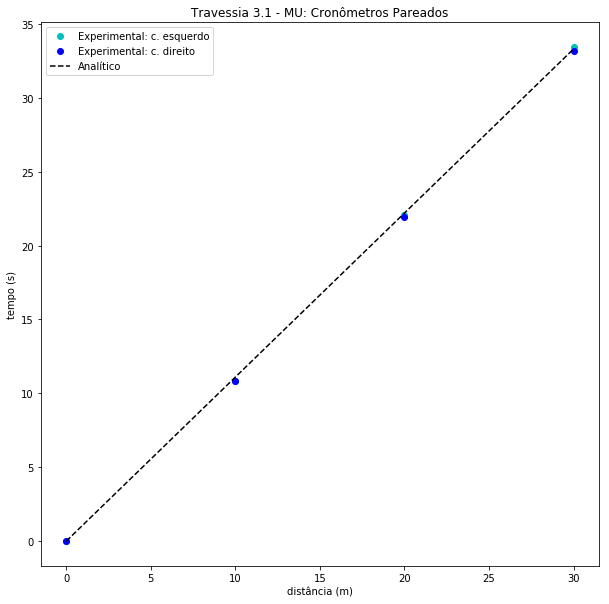

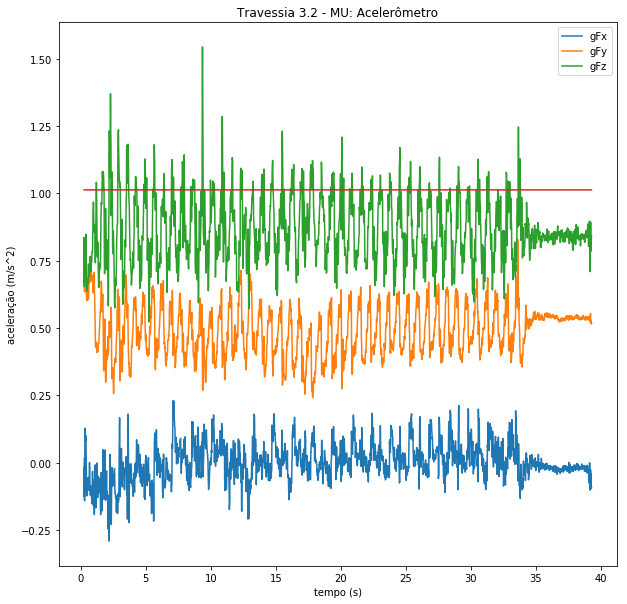

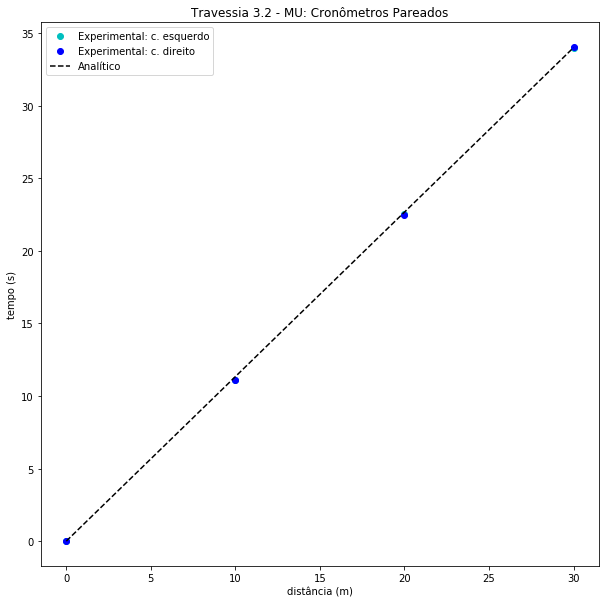

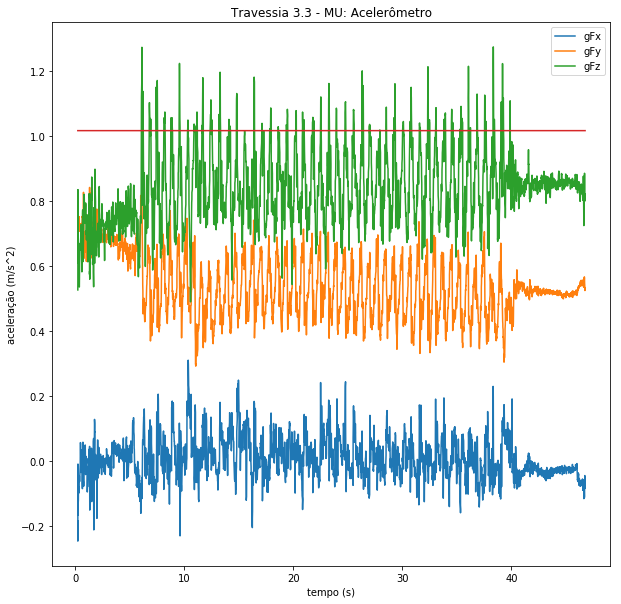

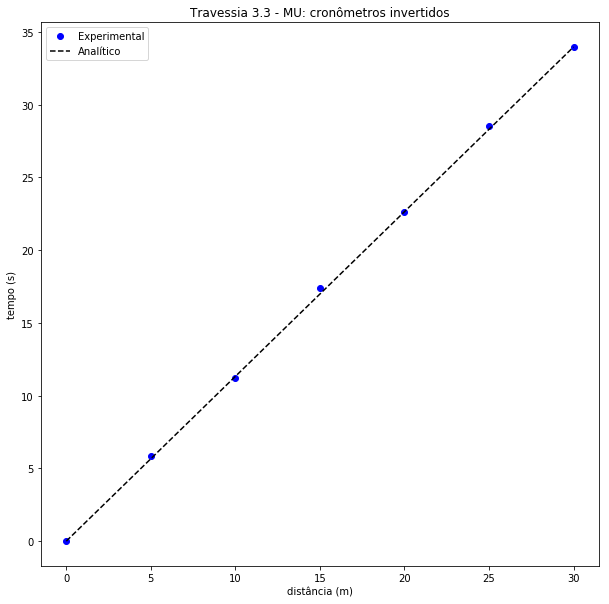

In [10]:
arquivos_acel = ["acelerometro/MU7 - 2018-03-1213.23.36.csv",
                 "acelerometro/MU8 - 2018-03-1213.25.57.csv",
                 "acelerometro/MU9 - 2018-03-1213.27.55.csv"]
plota_mu("tempo/tempo-bruna.csv", 3, [pandas.read_csv(arq) for arq in arquivos_acel])

### Movimento Uniformemente Variado

(1.1) Módulo do erro para cronômetro esquerdo: [0.0, 3.3701908557234646, 5.190837735372506, 7.257472513202023]
(1.1) Módulo do erro para cronômetor direito: [0.0, 3.4601908557234644, 5.120837735372506, 7.1974725132020225]
(1.2) Módulo do erro para cronômetro esquerdo: [0.0, 3.9101908557234646, 5.600837735372506, 7.517472513202023]
(1.2) Módulo do erro para cronômetor direito: [0.0, 3.7801908557234647, 5.110837735372506, 7.377472513202024]
Módulo do erro: [0.0, 1.4001908557234648, 2.7908377353725062, 3.6774725132020225, 4.020381711446929, 5.134815569796967, 5.662952295565445]


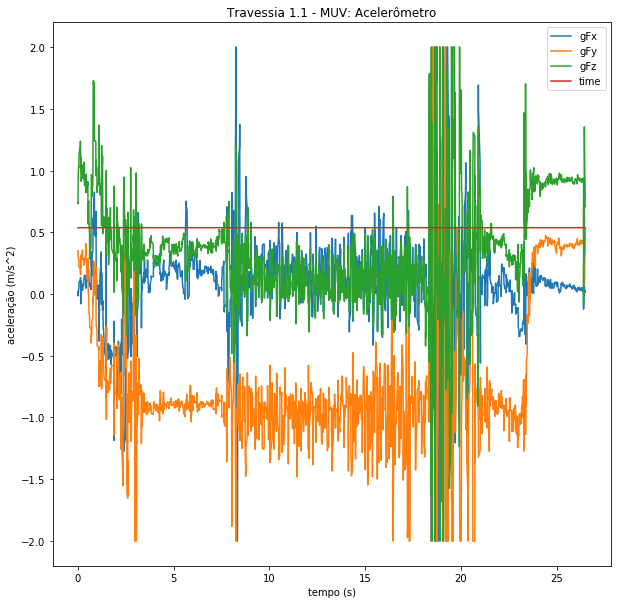

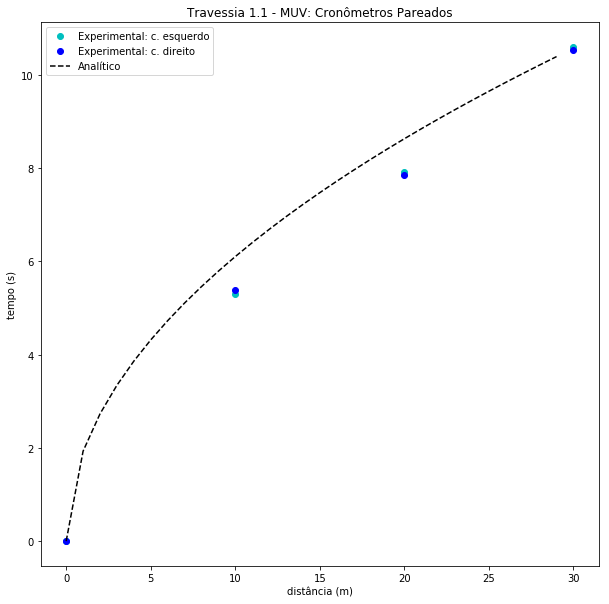

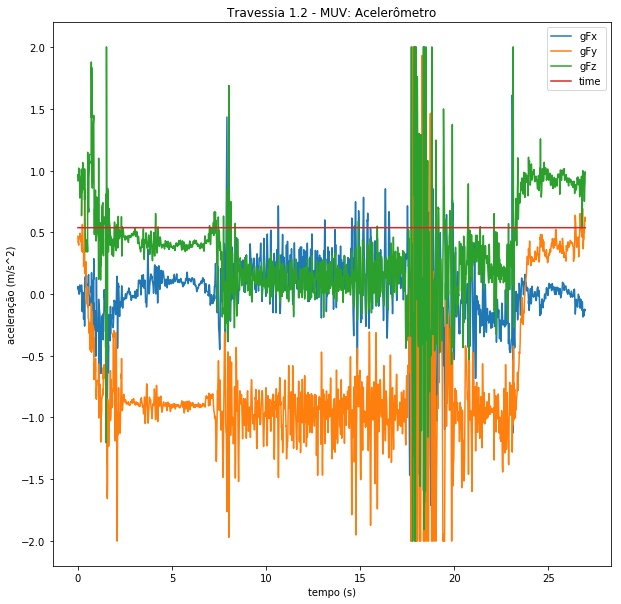

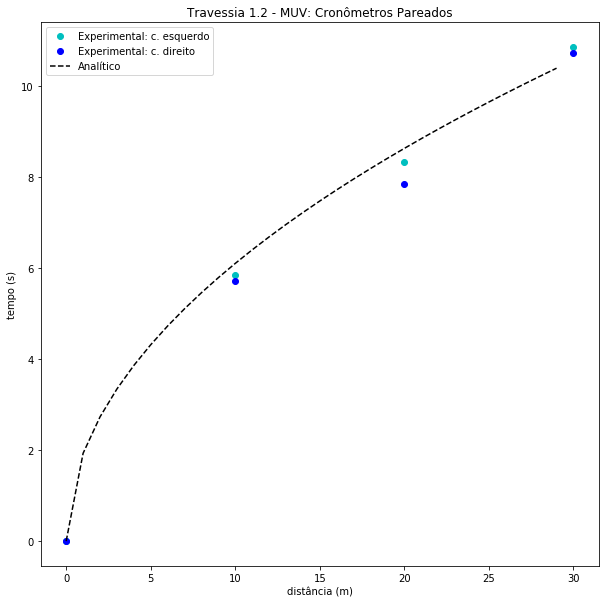

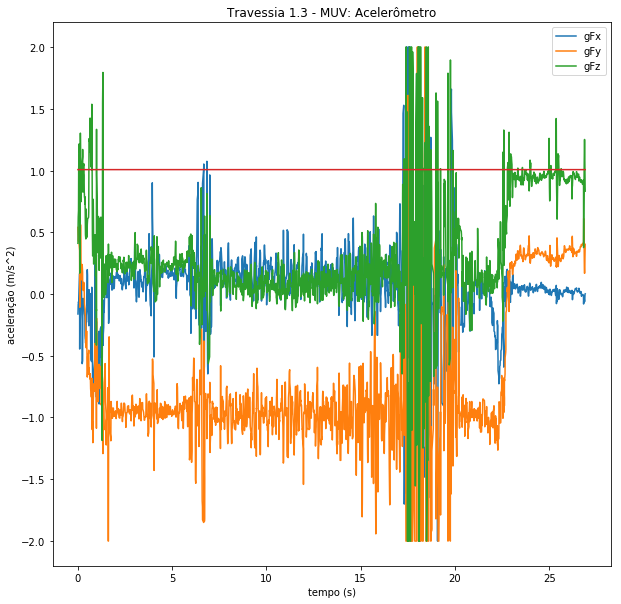

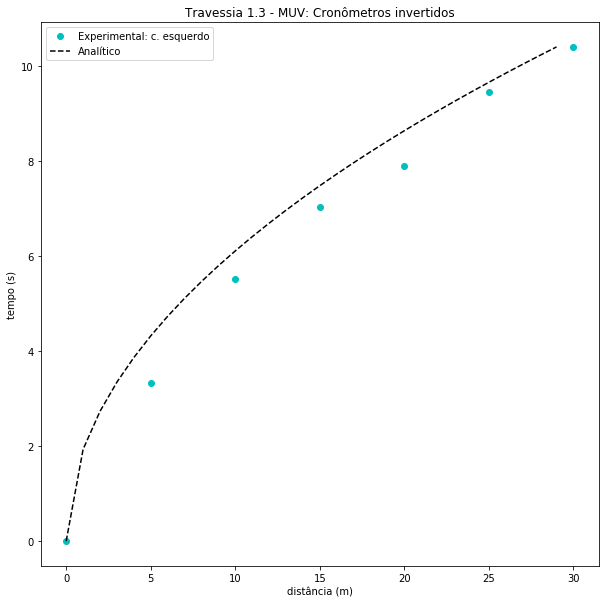

In [11]:
arquivos_acel = ["acelerometro/MUV 1 - 2018-03-2611.51.52.csv",
                 "acelerometro/MUV 2 - 2018-03-2611.50.03.csv",
                 "acelerometro/MUV 3 - 2018-03-2611.53.54.csv"]
plota_muv("tempo/tempo-muv1.csv", 1, [pandas.read_csv(arq) for arq in arquivos_acel])

(1.1) Módulo do erro para cronômetro esquerdo: [0.0, 2.7523927135014095, 4.162357836840153, 6.088221993090817]
(1.1) Módulo do erro para cronômetor direito: [0.0, 2.7523927135014095, 4.442357836840153, 6.028221993090816]
(1.2) Módulo do erro para cronômetro esquerdo: [0.0, 3.3223927135014097, 4.972357836840152, 6.818221993090815]
(1.2) Módulo do erro para cronômetor direito: [0.0, 3.272392713501409, 5.112357836840153, 6.448221993090816]
Módulo do erro: [0.0, 1.1123927135014096, 1.6623578368401528, 3.1382219930908164, 3.8247854270028188, 4.6229201464901735, 5.367687543870373]


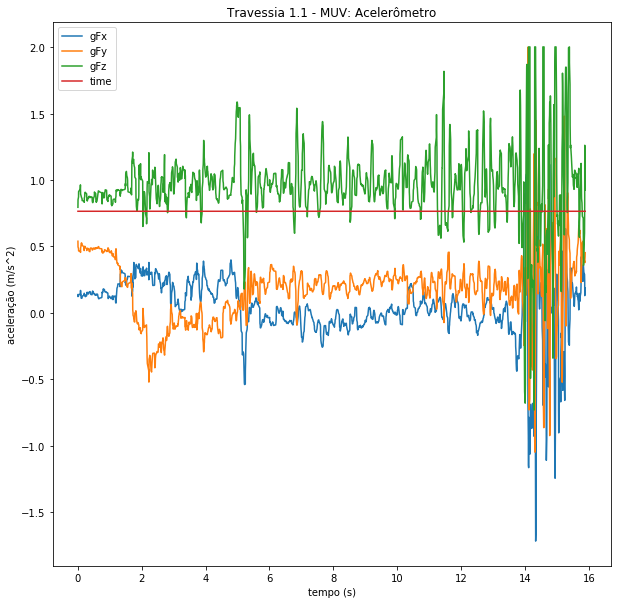

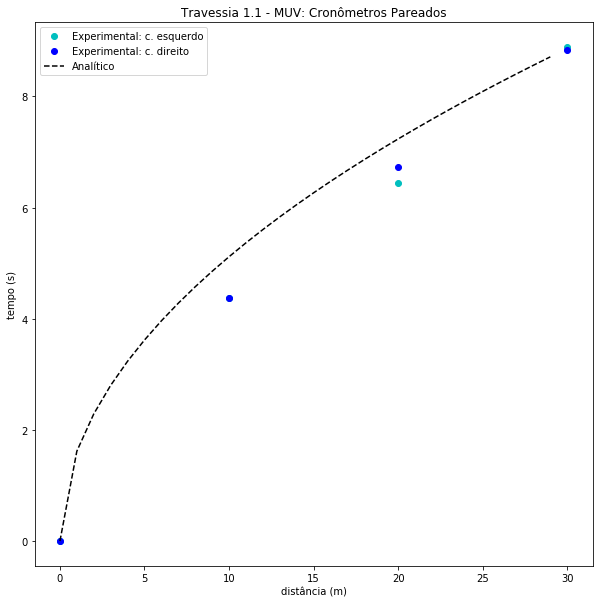

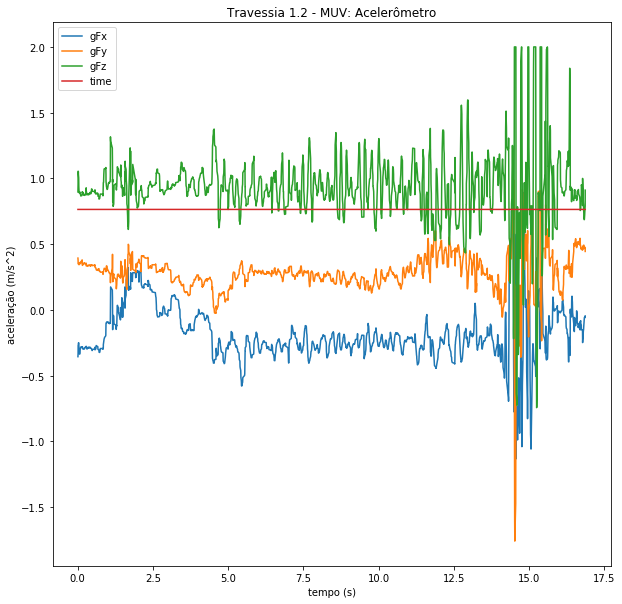

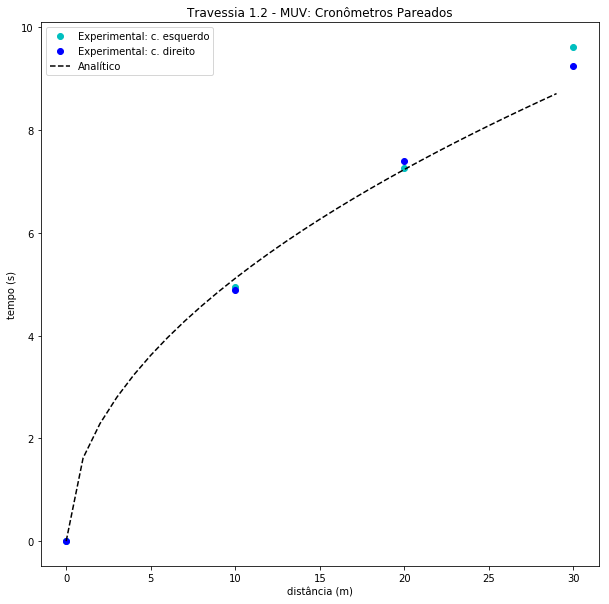

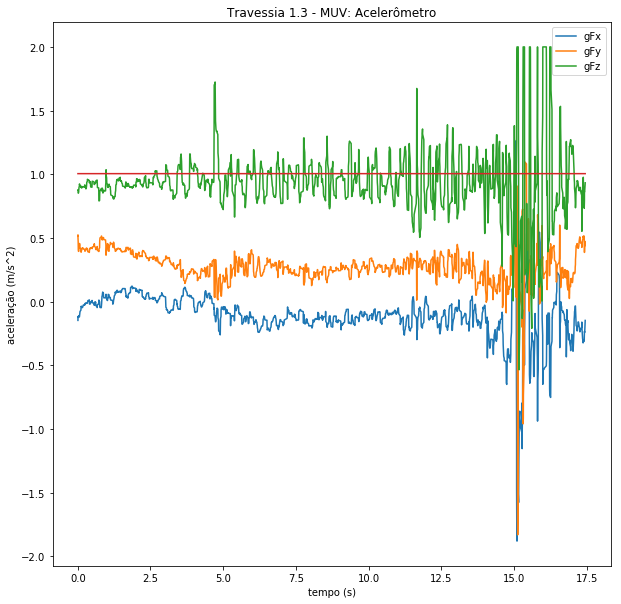

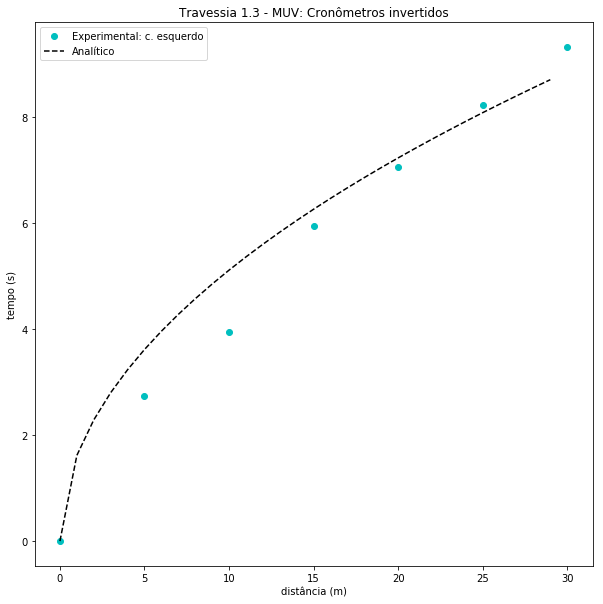

In [12]:
arquivos_acel = ["acelerometro/MUV 4 - 2018-03-2611.59.33.csv",
                 "acelerometro/MUV 5 - 2018-03-2612.01.50.csv",
                 "acelerometro/MUV 6 - 2018-03-2612.02.46.csv"]
plota_muv("tempo/tempo-muv2.csv", 1, [pandas.read_csv(arq) for arq in arquivos_acel])

(1.1) Módulo do erro para cronômetro esquerdo: [0.0, 3.3534681174518135, 5.538193262742606, 7.407264324344025]
(1.1) Módulo do erro para cronômetor direito: [0.0, 2.8934681174518135, 5.618193262742606, 7.697264324344024]
(1.2) Módulo do erro para cronômetro esquerdo: [0.0, 2.953468117451813, 4.878193262742606, 6.4672643243440255]
(1.2) Módulo do erro para cronômetor direito: [0.0, 2.4434681174518134, 4.298193262742606, 6.447264324344024]
Módulo do erro: [0.0, 1.4034681174518133, 2.4281932627426053, 3.217264324344025, 3.666936234903627, 4.6408976318266335, 5.210525837702965]


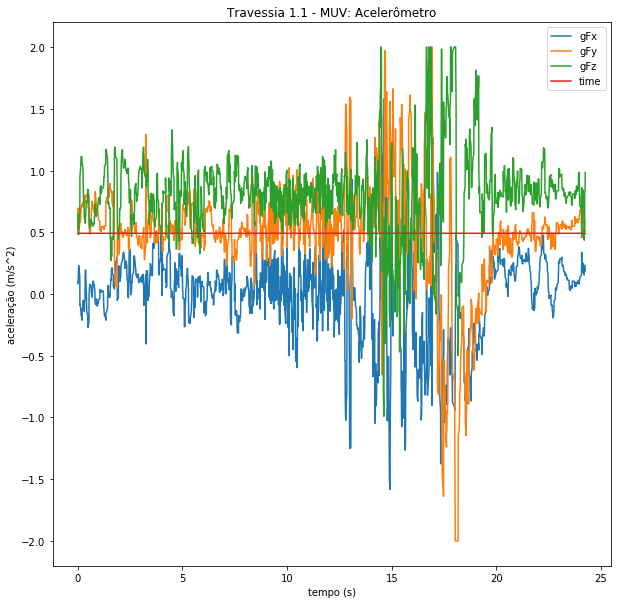

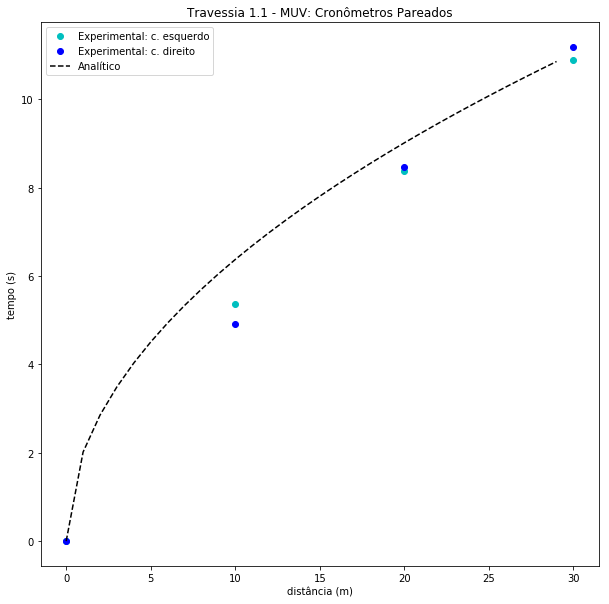

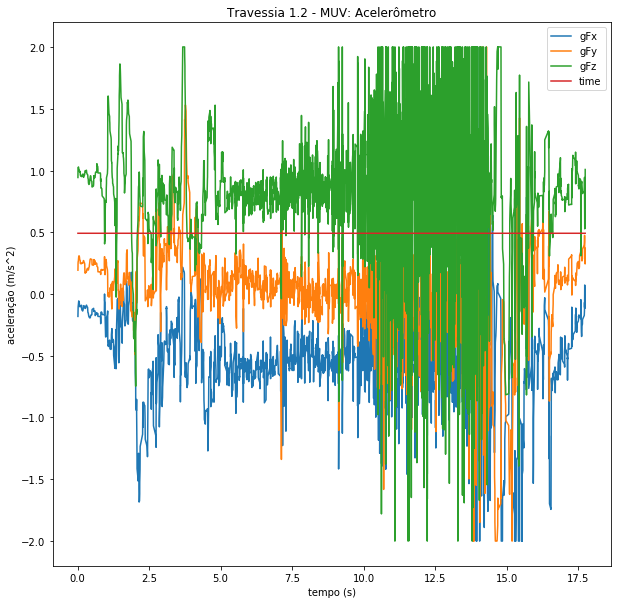

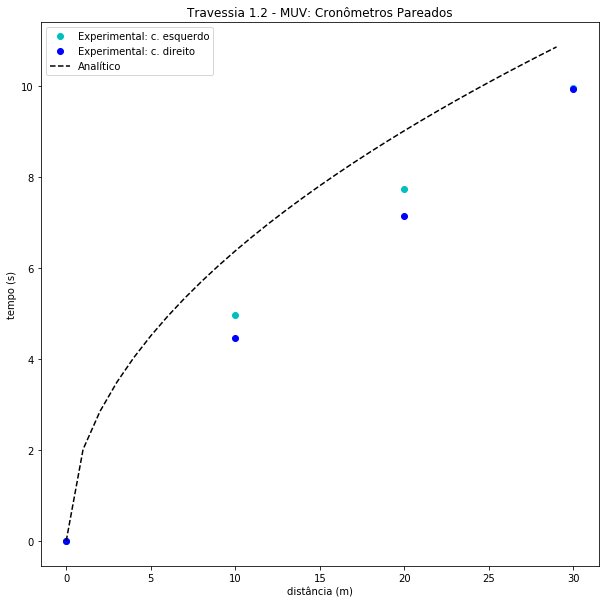

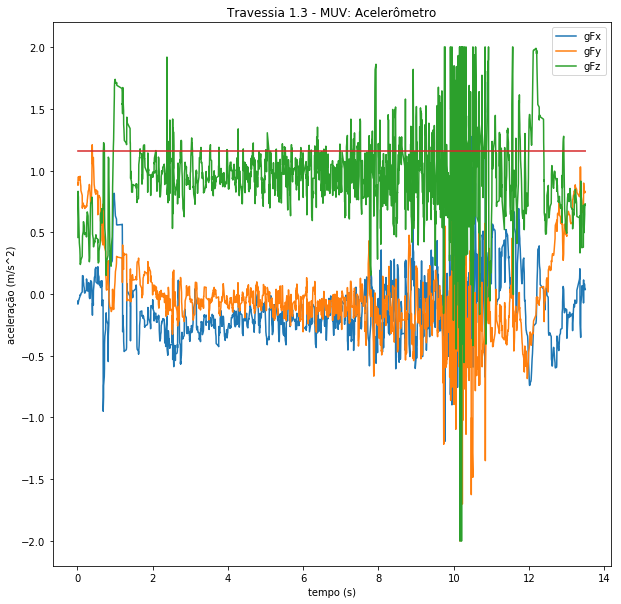

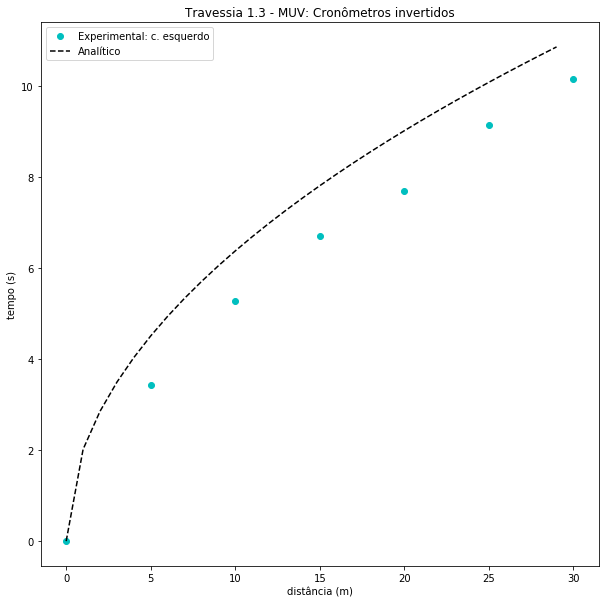

In [13]:
arquivos_acel = ["acelerometro/MUV 7 - 2018-03-2612.17.56.csv",
                 "acelerometro/MUV 8 - 2018-03-2612.19.13.csv",
                 "acelerometro/MUV 9 - 2018-03-2612.20.17.csv"]
plota_muv("tempo/tempo-muv3.csv", 1, [pandas.read_csv(arq) for arq in arquivos_acel])

Módulo do erro: [0.0, 0.11790268016838201, 0.34243216796448994, 1.571381437464523]


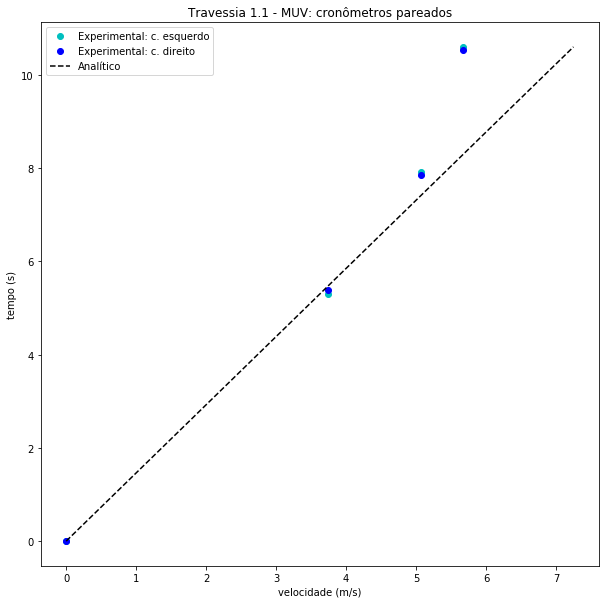

In [14]:
t = []
a = []
vObtido=[]

with open ("tempo/tempo-muv1.csv", "r") as mu1:
    rd = csv.reader(mu1, quoting=csv.QUOTE_NONNUMERIC)
    for line in rd:
        t.append([0] + line)
             
t_seq = (t[6][1:] + t[7])
t_seq.sort()

cos86 = 0.0697
grav = 9.81
am = cos86 * grav 
# Calculando analiticamente para a travessia 2.1
# Obtendo aceleração média a partir do tempo total (média dos 2 cronômetros)
for i in range(0, 4):
    temp= (t[0][i] + t[1][i]) / 2
    if(i == 0):
        aaux=0
    else:   
        aaux=2*(i*10) / (temp*temp)
    a.append(aaux)
    vObtido.append(aaux * temp)

tAna = []
vAna= []
for tempo in t[0]:
    tAna.append(tempo)
    vAna.append((am * tempo))
plt.figure(figsize=(10,10))
plt.title("Travessia 1.1 - MUV: cronômetros pareados")   
plt.xlabel('velocidade (m/s)')
plt.ylabel('tempo (s)')
plt.plot(vObtido, t[0], 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(vObtido, t[1],'bo', linestyle = "", label = "Experimental: c. direito")
plt.plot(vAna, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)
erro = [abs(x - y) for x, y in zip(vObtido, vAna)]
print("Módulo do erro:", erro)

Módulo do erro: [0.0, 0.5299374167965372, 0.7482622911379107, 1.8648966641149212]


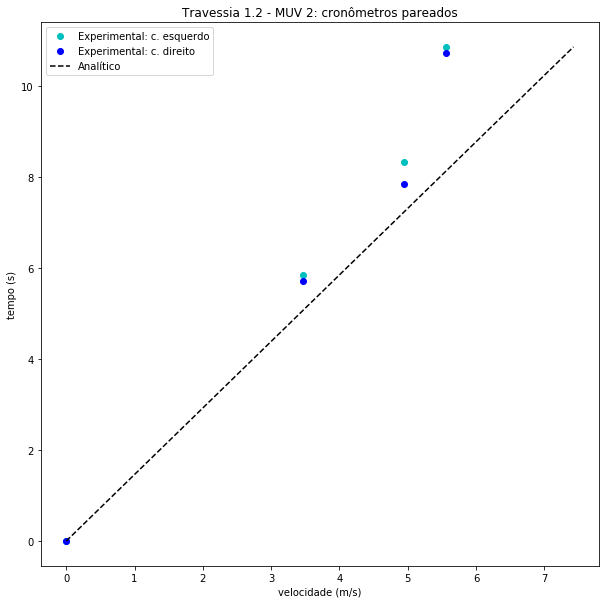

In [15]:
t = []
a = []
vObtido=[]

with open ("tempo/tempo-muv1.csv", "r") as mu1:
    rd = csv.reader(mu1, quoting=csv.QUOTE_NONNUMERIC)
    for line in rd:
        t.append([0] + line)
             
t_seq = (t[6][1:] + t[7])
t_seq.sort()

cos86 = 0.0697
grav = 9.81
am = cos86 * grav 
# Calculando analiticamente para a travessia 2.1
# Obtendo aceleração média a partir do tempo total (média dos 2 cronômetros)
for i in range(0, 4):
    temp= (t[3][i] + t[4][i]) / 2
    if(i == 0):
        aaux=0
    else:   
        aaux=2*(i*10) / (temp*temp)
    a.append(aaux)
    vObtido.append(aaux * temp)

tAna = []
vAna= []
for tempo in t[3]:
    tAna.append(tempo)
    vAna.append((am * tempo))
plt.figure(figsize=(10,10))
plt.title("Travessia 1.2 - MUV 2: cronômetros pareados")   
plt.xlabel('velocidade (m/s)')
plt.ylabel('tempo (s)')
plt.plot(vObtido, t[3], 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(vObtido, t[4],'bo', linestyle = "", label = "Experimental: c. direito")
plt.plot(vAna, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)
erro = [abs(x - y) for x, y in zip(vObtido, vAna)]
print("Módulo do erro:", erro)

Módulo do erro: [0.0, 0.7260921930030024, 0.15115023420289786, 0.5264698664957255, 0.31186302802030497, 1.170498358994708, 1.3294517843792129]


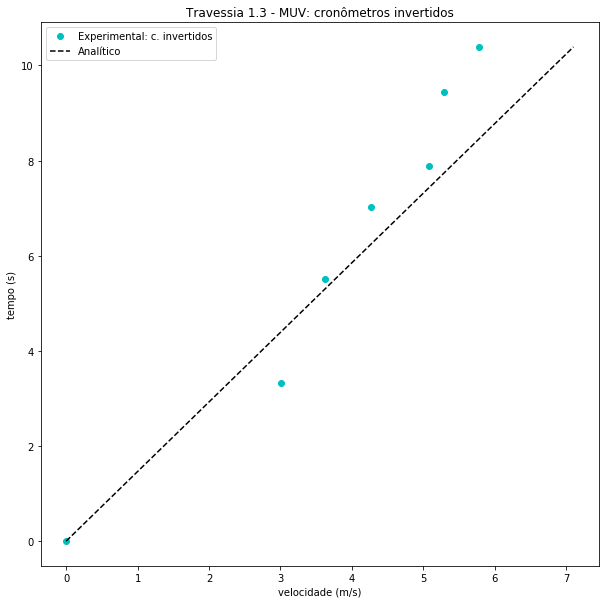

In [16]:
t = []
a = []
vObtido=[]

with open ("tempo/tempo-muv1.csv", "r") as mu1:
    rd = csv.reader(mu1, quoting=csv.QUOTE_NONNUMERIC)
    for line in rd:
        t.append([0] + line)
             
t_seq = (t[6][1:] + t[7])
t_seq.sort()

cos86 = 0.0697
grav = 9.81
am = cos86 * grav 
# Calculando analiticamente para a travessia 2.1
# Obtendo aceleração média a partir do tempo total (média dos 2 cronômetros)
i=1
for temp in t_seq:
    if(temp == 0):
        aaux=0
    else:   
        aaux=2*(i*5) / (temp*temp)
        i=i+1
    a.append(aaux)
    vObtido.append(aaux * temp)
tAna = []
vAna= []
for tempo in t_seq:
    tAna.append(tempo)
    vAna.append((am * tempo))
plt.figure(figsize=(10,10))
plt.title("Travessia 1.3 - MUV: cronômetros invertidos")   
plt.xlabel('velocidade (m/s)')
plt.ylabel('tempo (s)')
plt.plot(vObtido, t_seq, 'co', linestyle = "", label = "Experimental: c. invertidos")
plt.plot(vAna, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)
erro = [abs(x - y) for x, y in zip(vObtido, vAna)]
print("Módulo do erro:", erro)

Módulo do erro: [0.0, 1.5886409489016011, 1.6595700814112284, 0.6934092993453724]


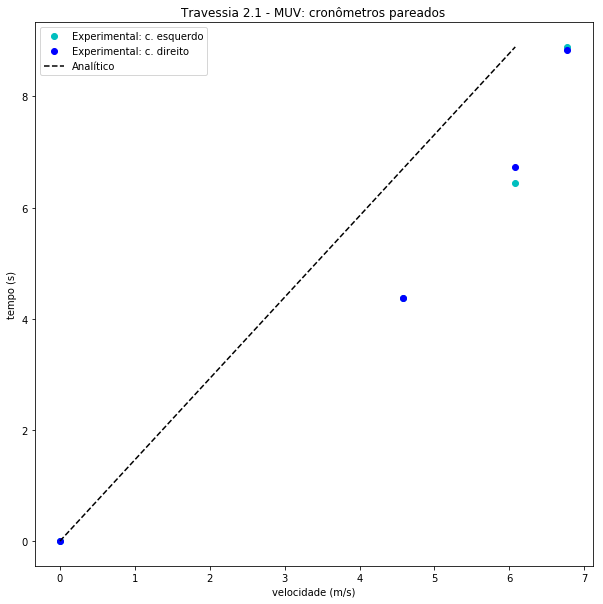

In [17]:
t = []
a = []
vObtido=[]

with open ("tempo/tempo-muv2.csv", "r") as mu1:
    rd = csv.reader(mu1, quoting=csv.QUOTE_NONNUMERIC)
    for line in rd:
        t.append([0] + line)
             
t_seq = (t[6][1:] + t[7])
t_seq.sort()

cos86 = 0.0697
grav = 9.81
am = cos86 * grav 
# Calculando analiticamente para a travessia 2.1
# Obtendo aceleração média a partir do tempo total (média dos 2 cronômetros)
for i in range(0, 4):
    temp= (t[0][i] + t[1][i]) / 2
    if(i == 0):
        aaux=0
    else:   
        aaux=2*(i*10) / (temp*temp)
    a.append(aaux)
    vObtido.append(aaux * temp)

tAna = []
vAna= []
for tempo in t[0]:
    tAna.append(tempo)
    vAna.append((am * tempo))
plt.figure(figsize=(10,10))
plt.title("Travessia 2.1 - MUV: cronômetros pareados")   
plt.xlabel('velocidade (m/s)')
plt.ylabel('tempo (s)')
plt.plot(vObtido, t[0], 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(vObtido, t[1],'bo', linestyle = "", label = "Experimental: c. direito")
plt.plot(vAna, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)
erro = [abs(x - y) for x, y in zip(vObtido, vAna)]
print("Módulo do erro:", erro)

Módulo do erro: [0.0, 0.6914164118616477, 0.49295010087312363, 0.2184418630524636]


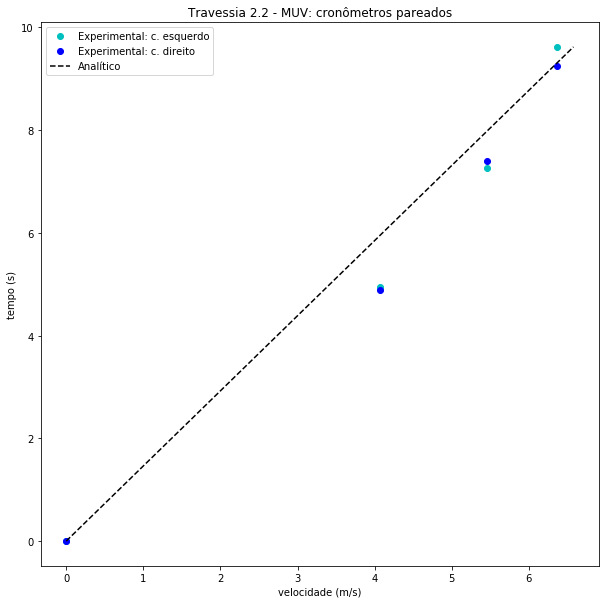

In [18]:
t = []
a = []
vObtido=[]

with open ("tempo/tempo-muv2.csv", "r") as mu1:
    rd = csv.reader(mu1, quoting=csv.QUOTE_NONNUMERIC)
    for line in rd:
        t.append([0] + line)
             
t_seq = (t[6][1:] + t[7])
t_seq.sort()

cos86 = 0.0697
grav = 9.81
am = cos86 * grav 
# Calculando analiticamente para a travessia 2.1
# Obtendo aceleração média a partir do tempo total (média dos 2 cronômetros)
for i in range(0, 4):
    temp= (t[3][i] + t[4][i]) / 2
    if(i == 0):
        aaux=0
    else:   
        aaux=2*(i*10) / (temp*temp)
    a.append(aaux)
    vObtido.append(aaux * temp)

tAna = []
vAna= []
for tempo in t[3]:
    tAna.append(tempo)
    vAna.append((am * tempo))
plt.figure(figsize=(10,10))
plt.title("Travessia 2.2 - MUV: cronômetros pareados")   
plt.xlabel('velocidade (m/s)')
plt.ylabel('tempo (s)')
plt.plot(vObtido, t[3], 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(vObtido, t[4],'bo', linestyle = "", label = "Experimental: c. direito")
plt.plot(vAna, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)
erro = [abs(x - y) for x, y in zip(vObtido, vAna)]
print("Módulo do erro:", erro)

Módulo do erro: [0.0, 1.7963470530036627, 2.3624509892405063, 0.9889884705050491, 0.8383979596033999, 0.4338034850485437, 0.051415357202571066]


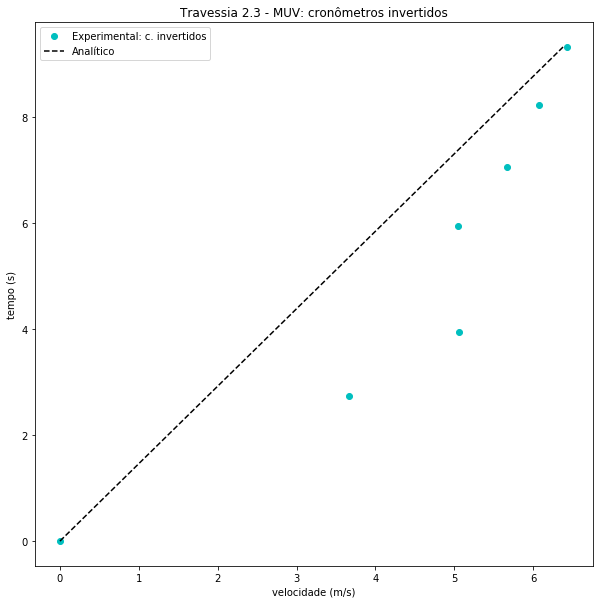

In [19]:
t = []
a = []
vObtido=[]

with open ("tempo/tempo-muv2.csv", "r") as mu1:
    rd = csv.reader(mu1, quoting=csv.QUOTE_NONNUMERIC)
    for line in rd:
        t.append([0] + line)
             
t_seq = (t[6][1:] + t[7])
t_seq.sort()

cos86 = 0.0697
grav = 9.81
am = cos86 * grav 
# Calculando analiticamente para a travessia 2.1
# Obtendo aceleração média a partir do tempo total (média dos 2 cronômetros)
i=1
for temp in t_seq:
    if(temp == 0):
        aaux=0
    else:   
        aaux=2*(i*5) / (temp*temp)
        i=i+1
    a.append(aaux)
    vObtido.append(aaux * temp)
tAna = []
vAna= []
for tempo in t_seq:
    tAna.append(tempo)
    vAna.append((am * tempo))
plt.figure(figsize=(10,10))
plt.title("Travessia 2.3 - MUV: cronômetros invertidos")   
plt.xlabel('velocidade (m/s)')
plt.ylabel('tempo (s)')
plt.plot(vObtido, t_seq, 'co', linestyle = "", label = "Experimental: c. invertidos")
plt.plot(vAna, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)
erro = [abs(x - y) for x, y in zip(vObtido, vAna)]
print("Módulo do erro:", erro)

Módulo do erro: [0.0, 0.21927549365758692, 0.991762748386714, 2.0206289822091446]


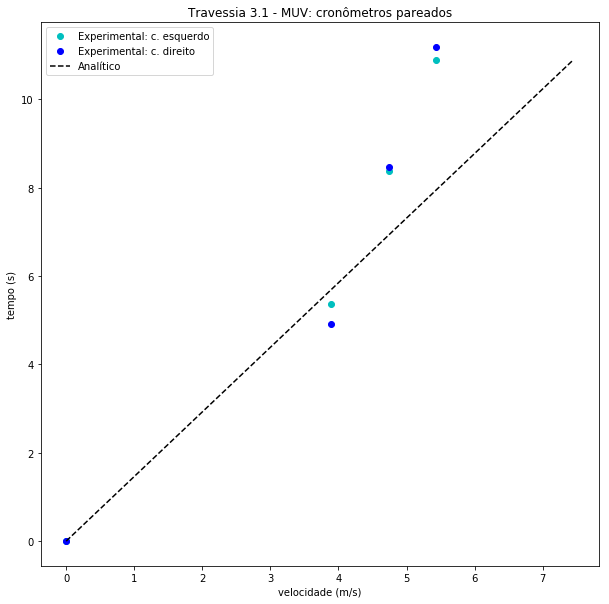

In [20]:
t = []
a = []
vObtido=[]

with open ("tempo/tempo-muv3.csv", "r") as mu1:
    rd = csv.reader(mu1, quoting=csv.QUOTE_NONNUMERIC)
    for line in rd:
        t.append([0] + line)
             
t_seq = (t[6][1:] + t[7])
t_seq.sort()

cos86 = 0.0697
grav = 9.81
am = cos86 * grav 
# Calculando analiticamente para a travessia 2.1
# Obtendo aceleração média a partir do tempo total (média dos 2 cronômetros)
for i in range(0, 4):
    temp= (t[0][i] + t[1][i]) / 2
    if(i == 0):
        aaux=0
    else:   
        aaux=2*(i*10) / (temp*temp)
    a.append(aaux)
    vObtido.append(aaux * temp)

tAna = []
vAna= []
for tempo in t[0]:
    tAna.append(tempo)
    vAna.append((am * tempo))
plt.figure(figsize=(10,10))
plt.title("Travessia 3.1 - MUV: cronômetros pareados")   
plt.xlabel('velocidade (m/s)')
plt.ylabel('tempo (s)')
plt.plot(vObtido, t[0], 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(vObtido, t[1],'bo', linestyle = "", label = "Experimental: c. direito")
plt.plot(vAna, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)
erro = [abs(x - y) for x, y in zip(vObtido, vAna)]
print("Módulo do erro:", erro)

Módulo do erro: [0.0, 0.8435092582502652, 0.0909024760215047, 0.7800689662311564]


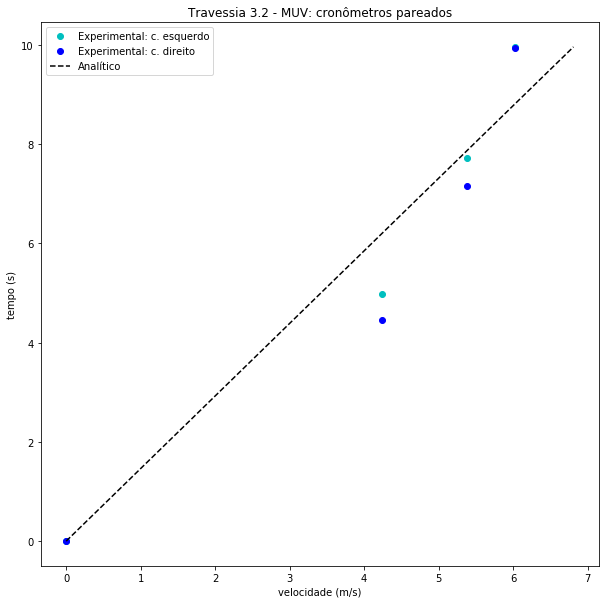

In [21]:
t = []
a = []
vObtido=[]

with open ("tempo/tempo-muv3.csv", "r") as mu1:
    rd = csv.reader(mu1, quoting=csv.QUOTE_NONNUMERIC)
    for line in rd:
        t.append([0] + line)
             
t_seq = (t[6][1:] + t[7])
t_seq.sort()

cos86 = 0.0697
grav = 9.81
am = cos86 * grav 
# Calculando analiticamente para a travessia 2.1
# Obtendo aceleração média a partir do tempo total (média dos 2 cronômetros)
for i in range(0, 4):
    temp= (t[3][i] + t[4][i]) / 2
    if(i == 0):
        aaux=0
    else:   
        aaux=2*(i*10) / (temp*temp)
    a.append(aaux)
    vObtido.append(aaux * temp)

tAna = []
vAna= []
for tempo in t[3]:
    tAna.append(tempo)
    vAna.append((am * tempo))
plt.figure(figsize=(10,10))
plt.title("Travessia 3.2 - MUV: cronômetros pareados")   
plt.xlabel('velocidade (m/s)')
plt.ylabel('tempo (s)')
plt.plot(vObtido, t[3], 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(vObtido, t[4],'bo', linestyle = "", label = "Experimental: c. direito")
plt.plot(vAna, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)
erro = [abs(x - y) for x, y in zip(vObtido, vAna)]
print("Módulo do erro:", erro)

Módulo do erro: [0.0, 0.5855276681871344, 0.17764182787878724, 0.11707057283159461, 0.07012370519480537, 0.7918956756830617, 1.028803500738917]


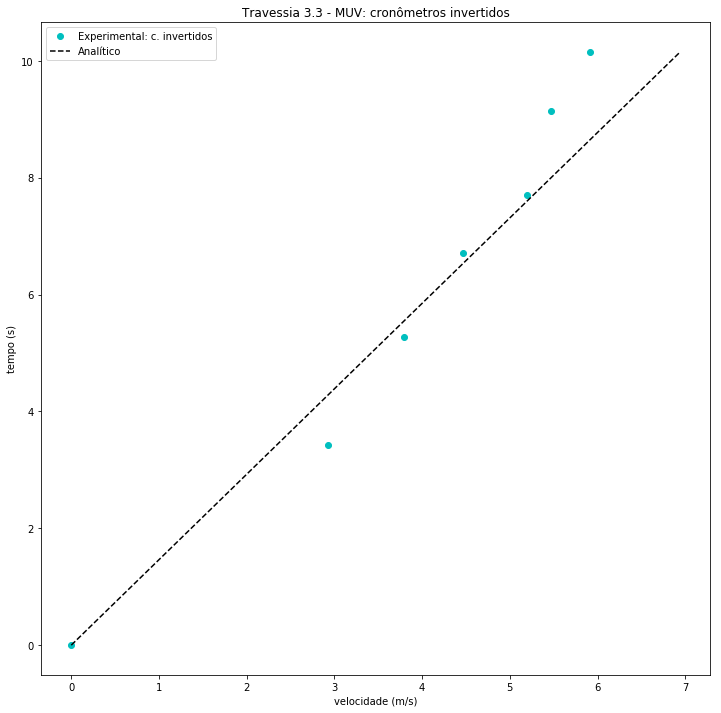

In [22]:
t = []
a = []
vObtido=[]

with open ("tempo/tempo-muv3.csv", "r") as mu1:
    rd = csv.reader(mu1, quoting=csv.QUOTE_NONNUMERIC)
    for line in rd:
        t.append([0] + line)
             
t_seq = (t[6][1:] + t[7])
t_seq.sort()

cos86 = 0.0697
grav = 9.81
am = cos86 * grav 
# Calculando analiticamente para a travessia 2.1
# Obtendo aceleração média a partir do tempo total (média dos 2 cronômetros)
i=1
for temp in t_seq:
    if(temp == 0):
        aaux=0
    else:   
        aaux=2*(i*5) / (temp*temp)
        i=i+1
    a.append(aaux)
    vObtido.append(aaux * temp)
tAna = []
vAna= []
for tempo in t_seq:
    tAna.append(tempo)
    vAna.append((am * tempo))
plt.figure(figsize=(12,12))
plt.title("Travessia 3.3 - MUV: cronômetros invertidos")   
plt.xlabel('velocidade (m/s)')
plt.ylabel('tempo (s)')
plt.plot(vObtido, t_seq, 'co', linestyle = "", label = "Experimental: c. invertidos")
plt.plot(vAna, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)
erro = [abs(x - y) for x, y in zip(vObtido, vAna)]
print("Módulo do erro:", erro)

## Análise

Enquanto nos experimentos realizados para o Movimento Uniforme o erro entre a modelagem numérica a partir do modelo físico e os dados experimentais foi satisfatório, com valor absoluto de menos de um segundo, no Movimento Uniformemente Variado ele foi maior, chegando a valores absolutos de cerca de sete segundos.

## Análise crítica e interpretação

### Movimento uniforme
Ao analisar os dados obtidos com os três experimentos realizados sobre o Movimento Uniforme e comparar com os resultados obtidos a partir das equações da física newtoniana, é possivel observar que o movimento real executado pelos três alunos em muito assemelhou-se ao resultado teórico para o nível de detalhamento desejado.

As discrepâncias observadas em alguns pontos, como aos 30 metros da travessia 1.1, podem ser atribuídas a erros experimentais, como o tempo de reação dos alunos operando os cronômetros e desatenção do aluno que fazia a travessia e consequente perda dos ritmos das passadas, entre outros. 

Entretanto, o erro absoluto nunca fui superior a um segundo, o que, considerando o experimento como um todo, as limitações do metodo e dos aparatos usados, pode ser considerado esperado.

No geral, o método adotado, com o uso de cronômetros, de metrônomo e de marcações no chão para cada passada, mostrou-se apropriado para a realização de um movimento uniforme. Reciprocamente, o modelo matemático implementado, que soluciona algoritmicamente a equação $ S = S_0 + vt $ refletiu satisfatoriamente os fenômenos do mundo real na escala desejada.

### Movimento uniformemente variado

A comparação dos dados dos experimentos de Movimento Uniformemente Variado frente ao modelo teórico, resultado da equação $ S = S_0 + v_0t + \alpha \frac{t^2}{2} $, foi menos satisfatória do que a do experimento anterior. Os erros obtidos foram maiores, por vezes superiores a 7 segundos, o que consideramos insatisfatórios.

Acreditamos que tal discrepância deva-se à maior dificuldade de realizar esse experimento: nossos planos de fazer uso da rampa da FAU, lisa e de inclinação constante, foram frustrados ao verificar que sua extensão é de 20 metros. O mesmo ocorreu com a rampa do prédio de História e Geografia da FFLCH e da Biblioteca Brasiliana. Assim, foi necessário realizar o experimento em uma rua inclinada mas que, por não ser fruto de um projeto arquitetônico, não possui inclinação constante em toda sua extensão e que, além disso, é coberta de asfalto, apresentando maior atrito para as rodas do skate. Ademais, a aceleração foi dada apenas pela aceleração da gravidade, de forma que nesse caso, a resistência do ar tornou-se mais relevante do que no experimento anterior.




## Crítica

Acreditamos que o EP cumpriu o objetivo de familiarização com a simulação e modelagem computacional de fenômenos físicos do mundo real. No entanto, pensamos que uma travessia de 20 metros forneceria resultados melhores, uma vez que é mais fácil encontrar rampas uniformes de tal tamanho no campus, como na FAU e na Biblioteca Brasiliana, enquanto que para cumprir o requisito de 30 metros tivemos que fazer uso de uma rua asfaltada com inclinação não constante. Ademais, consideramos que grupos maiores seriam mais adequados para a realização dos experimentos, uma vez que tivemos que contar com a colaboração de voluntários para seu sucesso. 

## Log

Foi gasta aproximadamente uma hora para o preparo e realização do experimento de MU e uma hora e meia para o de MUV.

O relatório, a programação e a análise dos dados tomou cerca de 2 horas e meia, com dois autores atuando em paralelo, e a edição do vídeo, 1 hora.

## Contribuição dos autores

Todos os autores operaram cronômetros no experimento de Movimento Uniforme, e Guilherme e Nathan no experimento de Movimento Uniformemente Variado. Bruna, Eduardo e Guilherme operaram a câmera e realizaram a travessia durante o experimento de MU, em revezamento. 

Além disso, contamos com a contribuição voluntária de Gabriel Russo, Germano Hüning Neuenfeld e Victor Raposo para operar os cronômetros no experimento de Movimento Uniforme; de Victor Batistella e Bruno Carneiro para realizar a travessa no experimento de MUV e de Pedro Paulo, Daniel Martinez e Lucas Moretto para operar a câmera e cronômetros durante o mesmo.

Bruna, Eduardo e Leonardo redigiram e programaram o relatório e Erica editou o vídeo.

Todos os autores leram e aprovaram a versão final deste relatório.

## Vídeo dos experimentos

[Link para o vídeo no YouTube](https://www.youtube.com/watch?v=ekFRp_ukFtw&feature=youtu.be)